In [0]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [2]:
trainset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())
batch_size=4
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:01, 7779917.35it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 330212.23it/s]
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 4492059.17it/s]                            
8192it [00:00, 129941.34it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
dataiter=iter(trainloader)
images,labels=next(dataiter)
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
3


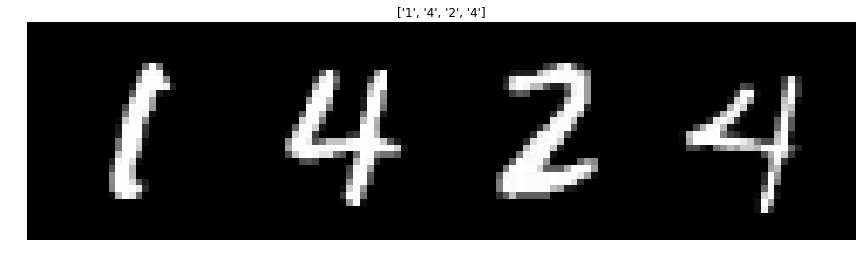

In [4]:
def imshow(img,title):
    plt.figure(figsize=(batch_size*4,4))
    plt.axis('off')
    plt.imshow(np.transpose(img,(1,2,0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images,labels=next(iter(dataloader))
    img=torchvision.utils.make_grid(images)
    imshow(img,title=[str(x.item()) for x in labels])
    return images,labels

images,labeks=show_batch_images(trainloader)

#Batch 
Normalisation

In [0]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        self.classifier=nn.Sequential(
        nn.Linear(784,48),
        nn.ReLU(48),
        nn.Linear(48,24),
        nn.ReLU(24),
        nn.Linear(24,10)
        )
    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=self.classifier(x)
        return x
class MyNetBN(nn.Module):
    def __init__(self):
        super(MyNetBN,self).__init__()
        self.classifier=nn.Sequential(
        nn.Linear(784,48),
        nn.BatchNorm1d(48),
        nn.ReLU(48),
        nn.Linear(48,24),
        nn.BatchNorm1d(24),
        nn.ReLU(24),
        nn.Linear(24,10)
        )
    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=self.classifier(x)
        return x

In [6]:
model=MyNet()
print(model)
model_bn=MyNetBN()
print(model_bn)

MyNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)
MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [0]:
batch_size=512
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)


loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model.parameters(),lr=0.01)
opt_bn=optim.SGD(model_bn.parameters(),lr=0.01)


0.00010885015 0.09241473 0.050503135 0.09115832


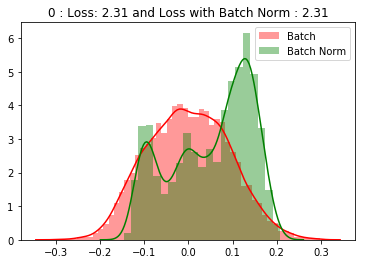

0.0009099785 0.09295823 0.049952038 0.090570934


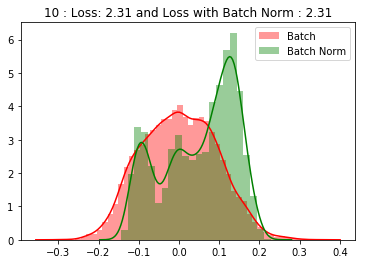

0.0024592427 0.09371546 0.050110795 0.089633554


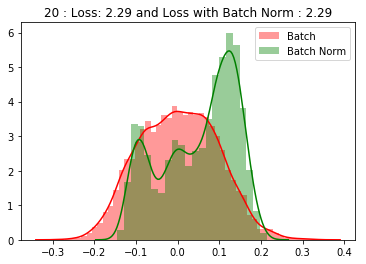

0.0037765794 0.094705604 0.049731303 0.08872873


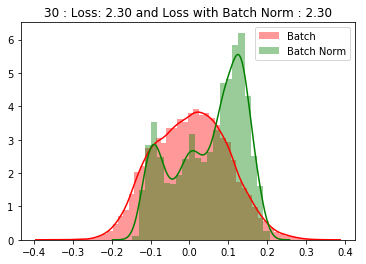

0.004555082 0.09762914 0.048874486 0.08731775


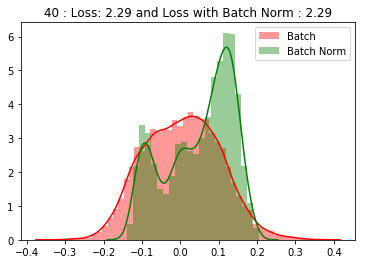

0.005641286 0.09772323 0.04906772 0.087155774


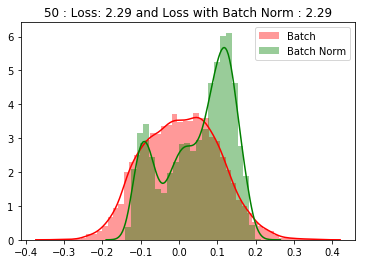

0.006676486 0.1005151 0.04799055 0.08665834


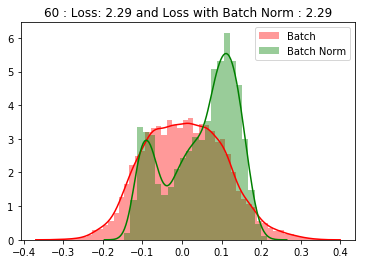

0.008482942 0.10264111 0.048579812 0.0859854


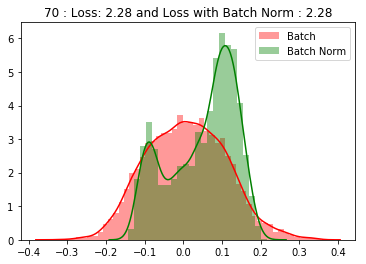

0.008721639 0.10522527 0.048123397 0.08473973


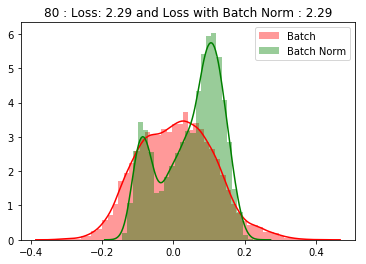

0.010619785 0.106631756 0.04863421 0.08459064


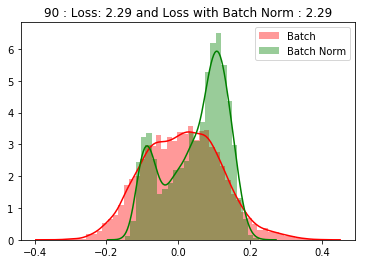

0.012367404 0.10823156 0.049017824 0.084542185


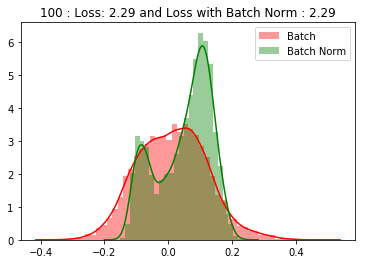

0.013953455 0.110368 0.048676044 0.08430887


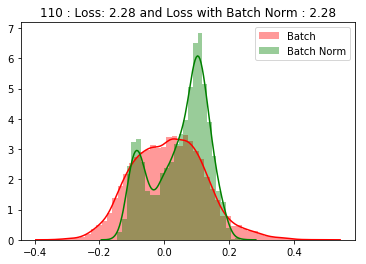

In [8]:
loss_arr=[]
loss_bn_arr=[]
max_epochs=1

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader):
        inputs,labels=data
        
        opt.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        
        opt_bn.zero_grad()
        outputs=model(inputs)
        loss_bn=loss_fn(outputs,labels)
        loss_bn.backward()
        opt_bn.step()
        
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())

        if i % 10 ==0:
            inputs=inputs.view(inputs.size(0),-1)
            
            model.eval()
            model_bn.eval()
            
            
            a=model.classifier[0](inputs)
            a=model.classifier[1](a)
            a=model.classifier[2](a)
            a=a.detach().numpy().ravel()
            sns.distplot(a,kde=True,color='r',label='Batch')
            
            b=model.classifier[0](inputs)
            b=model.classifier[1](b)
            b=model.classifier[2](b)
            b=model.classifier[3](b)
            b=model.classifier[4](b)
            b=b.detach().numpy().ravel()
            sns.distplot(b,kde=True,color='g',label='Batch Norm')
            
            print(np.mean(a),np.std(a),np.mean(b),np.std(b))
            plt.title('%d : Loss: %0.2f and Loss with Batch Norm : %0.2f' %(i,loss.item(),loss_bn.item()))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            model.train()
            model_bn.train()
        

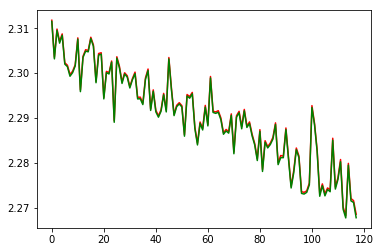

In [9]:
plt.plot(loss_arr,color='r')
plt.plot(loss_bn_arr,color='g')
plt.show()

In [0]:
class CNN_BN(nn.Module):
    def __init__(self):
        super(CNN_BN,self).__init__()
        self.features=nn.Sequential(
        nn.Conv2d(1,3,5),  # (N,1,28,28 -> (N,3,24,24))
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2), # (N,3,24,24) -> (N,3,12,12)
        nn.Conv2d(3,6,3)       # (N,3,12,12)  -> (N,6,10,10),
        #nn.BatchNorm2d(6)
        )
        self.features1=nn.Sequential(
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2) #(N,6,10,10) -> (N,6,5,5)
        )
        self.classifier=nn.Sequential(
        nn.Linear(150,25), # (N,150)-> N(25)
        nn.ReLU(),
        nn.Linear(25,10) #(N,25) -> (N,10)
        )
    def forward(self,x):
        x=self.features(x)
        x=self.features1(x)
        x=x.view(x.size(0),-1)
        x=self.classifier(x)
        return x

In [0]:
batch_size=128
trainloader=torch.utils.data.DataLoader(trainset,shuffle=True,batch_size=batch_size)

model_cnn=CNN_BN()

loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_cnn.parameters(),lr=0.01)



In [22]:
print(model_cnn)

CNN_BN(
  (features): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  )
  (features1): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
)


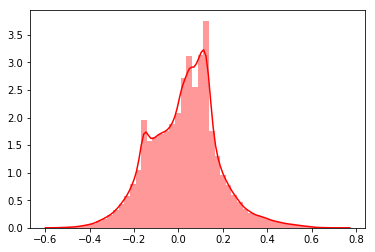

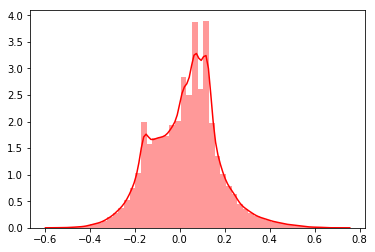

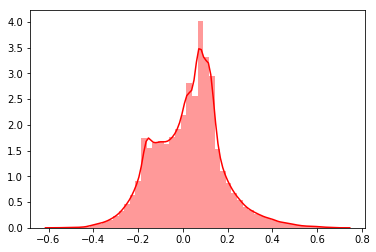

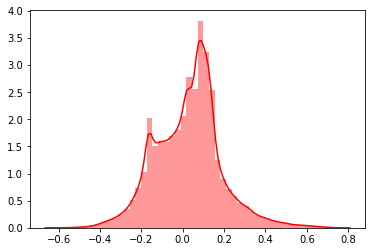

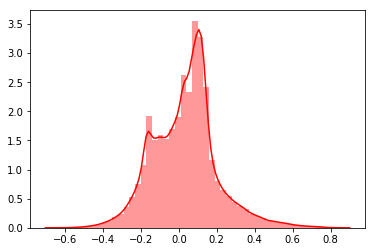

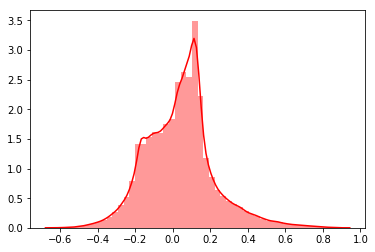

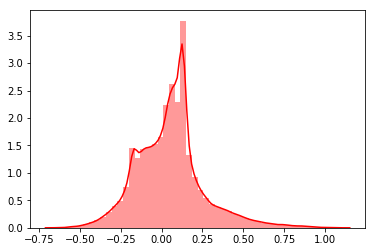

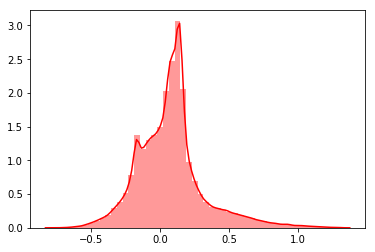

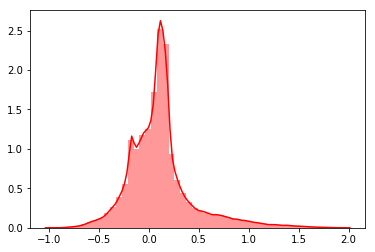

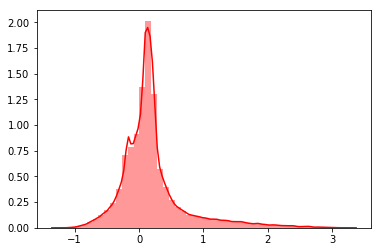

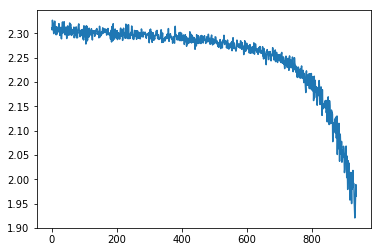

In [23]:
loss_arr=[]
max_epochs=2

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs,labels =data
        
        opt.zero_grad()
        outputs=model_cnn(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
        if i %100 ==0:
            model_cnn.eval()
            a=model_cnn.features[0](inputs)
            a=model_cnn.features[1](a)
            a=model_cnn.features[2](a)
            a=model_cnn.features[3](a)
            #a=model_cnn.features[4](a)
            a=a.detach().numpy().ravel()
            sns.distplot(a,kde=True,color='r')
            plt.show()
            
            
plt.plot(loss_arr)            